In [1]:
import pandas as pd

# Загрузка Датасетов

In [2]:
data_regression = pd.read_csv("../data/DataSet3Filtered.csv")

In [3]:
data_classification = pd.read_csv ("../data/DataSet4Filtered.csv")

In [4]:
data_regression.drop(["Unnamed: 0"], axis = 1, inplace = True)
data_classification.drop(["Unnamed: 0"], axis = 1, inplace = True)

## Создание словарей для результатов

In [5]:
reports = {}
regression_reports = {}
classification_reports = {}

# Обработка Регрессии

## Функция тестирования и оценки

In [6]:
def test_reg(name,X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  regression_reports[name] = (mean_squared_error(y_test, bag.predict(X_test)))
  print(mean_squared_error(y_test, bag.predict(X_test)))

## Без понижения размерности

In [7]:
data_regression.head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,-1,0,1
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,-1,0,1
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,-1,0,1
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,-1,2,1
4,13500000,1090,19.177555,72.849887,2,2,0,-1,1,0,0,0,1


In [8]:
data_regression.sort_values(by = "new_or_old",ascending = False)
data_regression = data_regression[:(data_regression[data_regression["new_or_old"] == 1].shape[0]*2)]
data_regression.shape

(970, 13)

In [9]:
data_regression[data_regression["new_or_old"] == 1].shape,data_regression[data_regression["new_or_old"] == 0].shape 

((227, 13), (743, 13))

In [10]:
data_regression = data_regression.sample(frac=1)

In [11]:
X_regression = data_regression.drop(['new_or_old'], axis=1)
y_regression = data_regression['new_or_old']

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [13]:
import numpy as np

In [14]:
np.random.seed(42)

In [15]:
test_reg("X_regression",X_regression, y_regression)

0.13589041095890414


In [16]:
X_regression.describe()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,parking,furnished_status,lift,type_of_building
count,9.700000e+02,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,2.271627e+07,1083.210309,19.137637,72.869992,2.331959,2.303093,0.484536,0.658763,0.484536,-0.051546,0.484536,1.040206
std,1.039978e+07,299.699421,0.080840,0.036933,0.515106,0.516888,0.706937,0.750679,0.706937,1.035701,0.706937,0.196544
min,3.500000e+06,520.000000,18.914452,72.761414,2.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000
25%,1.520000e+07,854.250000,19.081509,72.841268,2.000000,2.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,1.000000
50%,2.050000e+07,1034.500000,19.134512,72.864050,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2.800000e+07,1257.250000,19.190380,72.894817,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.550000e+07,1970.000000,19.406598,72.960220,4.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000


## VarianceThreshold

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt_regression = vt.fit_transform(X_regression)
X_vt_regression.shape

(970, 2)

In [19]:
X_vt_regression = pd.DataFrame(X_vt_regression, columns=vt.get_feature_names_out())
X_vt_regression.head()

,price,area
0,19500000.0,702.0
1,31200000.0,1782.0
2,13799999.0,1070.0
3,19000000.0,1233.0
4,21000000.0,1050.0


In [20]:
test_reg('X_vt_regression',X_vt_regression, y_regression)

0.21433047751063894


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_scaled_regression = scaler.fit_transform(X_regression)
X_scaled_regression = pd.DataFrame(X_scaled_regression, columns=X_regression.columns)
X_scaled_regression.head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,parking,furnished_status,lift,type_of_building
0,-0.309423,-1.272632,-0.231605,-0.161119,-0.644779,-0.586683,-0.685755,0.454806,-0.685755,1.015823,-0.685755,-0.204672
1,0.816182,2.332838,0.635365,-1.299916,1.297568,1.348971,-0.685755,0.454806,-0.685755,-0.916233,-0.685755,-0.204672
2,-0.857794,-0.044101,1.502231,-0.410892,-0.644779,-0.586683,0.729527,-2.210822,0.729527,0.049795,0.729527,-0.204672
3,-0.357525,0.500058,0.124350,1.749122,-0.644779,-0.586683,0.729527,0.454806,0.729527,-0.916233,0.729527,-0.204672
4,-0.165114,-0.110869,0.833741,-0.019544,1.297568,-0.586683,-0.685755,0.454806,-0.685755,0.049795,-0.685755,-0.204672


In [23]:
vt = VarianceThreshold(1)
X_vt_regression = vt.fit_transform(X_scaled_regression)
print(X_vt_regression.shape)
test_reg('X_vt_regression',X_vt_regression, y_regression)

(970, 4)
0.16824543519428709


## SelectKBest

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
skb = SelectKBest(k=6)
X_skb_regression = skb.fit_transform(X_regression, y_regression)
test_reg('X_skb_regression',X_skb_regression, y_regression)

0.14876712328767122


In [26]:
X_skb_regression = pd.DataFrame(X_skb_regression, columns=skb.get_feature_names_out())
X_skb_regression

,price,latitude,longitude,bathrooms,status,furnished_status
0,19500000.0,19.118923,72.864044,2.0,1.0,1.0
1,31200000.0,19.188973,72.822006,3.0,1.0,-1.0
2,13799999.0,19.259015,72.854824,2.0,-1.0,0.0
3,19000000.0,19.147684,72.934559,2.0,1.0,-1.0
4,21000000.0,19.205002,72.869270,2.0,1.0,0.0
...,...,...,...,...,...,...
965,30000000.0,19.152852,72.840615,3.0,1.0,-1.0
966,21000000.0,19.170237,72.955942,2.0,1.0,-1.0
967,18500000.0,19.205002,72.869271,2.0,1.0,1.0
968,22000000.0,19.115297,72.839762,2.0,1.0,-1.0


## RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier().fit(X_regression, y_regression)

In [29]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_regression, y_regression)
X_rfe_regression = pd.DataFrame(rfe.transform(X_regression), columns=rfe.get_feature_names_out())
X_rfe_regression

,price,area,longitude,status
0,19500000.0,702.0,72.864044,1.0
1,31200000.0,1782.0,72.822006,1.0
2,13799999.0,1070.0,72.854824,-1.0
3,19000000.0,1233.0,72.934559,1.0
4,21000000.0,1050.0,72.869270,1.0
...,...,...,...,...
965,30000000.0,1860.0,72.840615,1.0
966,21000000.0,976.0,72.955942,1.0
967,18500000.0,1005.0,72.869271,1.0
968,22000000.0,950.0,72.839762,1.0


In [30]:
test_reg('X_rfe_regression',X_rfe_regression, y_regression)

0.14659246575342466


In [31]:
import matplotlib.pyplot as plt

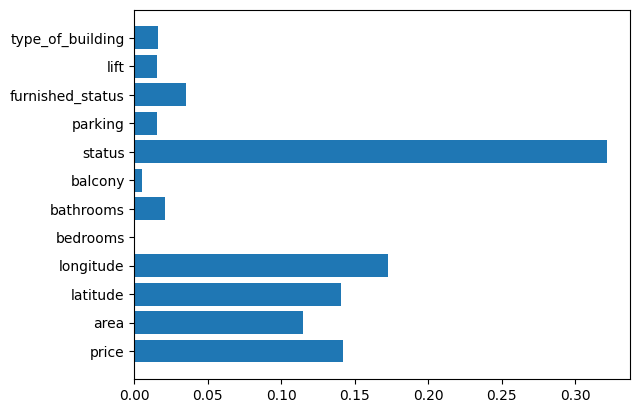

In [32]:
plt.barh(width=tree.feature_importances_, y=X_regression.columns);

## PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
X_pca_regression = pca.fit_transform(X_regression, y_regression)
X_pca_regression.shape

(970, 2)

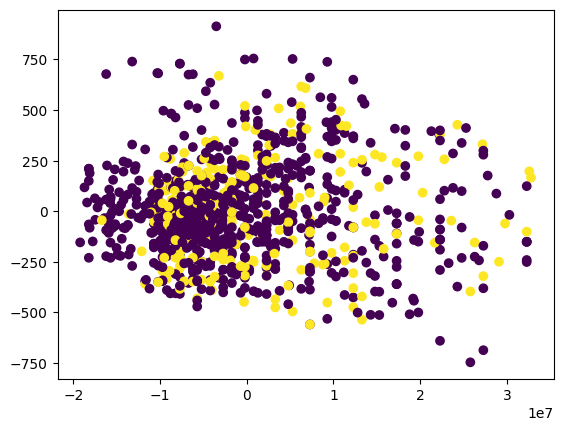

In [35]:
plt.scatter(X_pca_regression[:,0], X_pca_regression[:,1], c=y_regression);

In [36]:
sum(pca.explained_variance_ratio_)

0.9999999999999676

In [37]:
test_reg('X_pca_regression',X_pca_regression, y_regression)

0.21178082191780817


In [38]:
pca_2 = PCA(n_components=3)
X_pca_2_regression = pca_2.fit_transform(X_regression, y_regression)

In [39]:
test_reg('X_pca_2_regression',X_pca_2_regression, y_regression)

0.19232876712328767


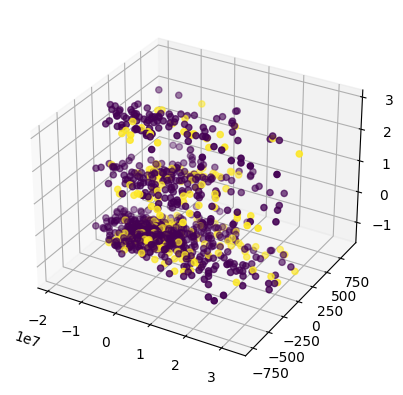

In [40]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2_regression[:,0], X_pca_2_regression[:,1], X_pca_2_regression[:,2], c=y_regression);

## TSNE

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(n_components=2)
X_tsne_regression = tsne.fit_transform(X_scaled_regression)

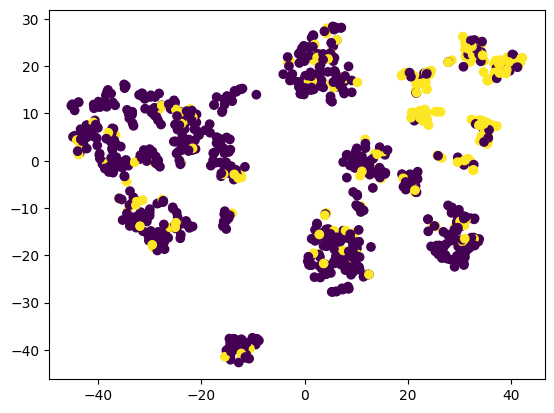

In [43]:
plt.scatter(X_tsne_regression[:,0], X_tsne_regression[:,1], c=y_regression);

In [44]:
test_reg('X_tsne_regression',X_tsne_regression, y_regression)

0.15294520547945203


## Isomap

In [45]:
from sklearn.manifold import Isomap

In [46]:
isomap = Isomap(n_components=2)
X_isomap_regression = isomap.fit_transform(X_scaled_regression)

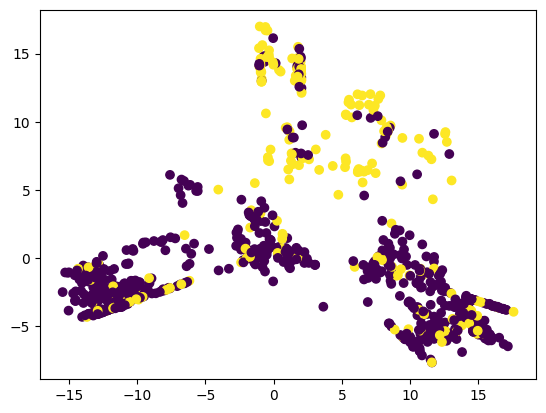

In [47]:
plt.scatter(X_isomap_regression[:,0], X_isomap_regression[:,1], c=y_regression);

In [48]:
test_reg('X_isomap_regression',X_isomap_regression, y_regression)

0.14917808219178083


## Просмотр и добавление отчёта в общий

In [49]:
for key in regression_reports:
    print(key, regression_reports[key])
reports['regression'] = regression_reports

X_regression 0.13589041095890414
X_vt_regression 0.16824543519428709
X_skb_regression 0.14876712328767122
X_rfe_regression 0.14659246575342466
X_pca_regression 0.21178082191780817
X_pca_2_regression 0.19232876712328767
X_tsne_regression 0.15294520547945203
X_isomap_regression 0.14917808219178083


# Обработка классификации

## Функция тестирования и оценки

In [50]:
def test_cl(name,X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  classification_reports[name] = (classification_report(y_test, bag.predict(X_test)))
  print(classification_report(y_test, bag.predict(X_test)))

## Без понижения размерности

In [51]:
data_classification.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,1654733569,0.846167,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238,0
1,1654733570,0.846419,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239,0
2,1654733571,0.846695,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,0
3,1654733578,0.848578,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,0
4,1654733579,0.848855,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,0


In [52]:
data_classification.sort_values(by = "Fire_Alarm",ascending = False)
data_classification = data_classification[:(data_classification[data_classification["Fire_Alarm"] == 1].shape[0]*2)]
data_classification.shape

(34520, 15)

In [53]:
data_classification[data_classification["Fire_Alarm"] == 1].shape,data_classification[data_classification["Fire_Alarm"] == 0].shape 

((29775, 15), (4745, 15))

In [54]:
data_classification = data_classification.sample(frac=1)

In [55]:
X_classification = data_classification.drop(['Fire_Alarm'], axis=1)
y_classification = data_classification['Fire_Alarm']

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [57]:
import numpy as np

In [58]:
np.random.seed(42)

In [59]:
test_cl("X_classification",X_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



In [60]:
X_classification.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,3.452000e+04,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000,34520.000000
mean,1.654761e+09,0.668900,51.247733,733.052404,408.192758,13024.531692,19703.004056,939.137910,1.520886,1.580512,10.466596,1.632786,0.037261,12674.214340
std,1.685122e+04,0.281719,2.896701,542.513170,17.951938,134.337350,316.933814,0.433594,0.653163,0.677764,4.497489,0.700012,0.015522,7631.258396
min,1.654712e+09,0.000000,41.350000,0.000000,400.000000,12609.000000,19357.000000,937.625000,0.070000,0.090000,0.360000,0.095000,0.007000,81.000000
25%,1.654748e+09,0.577676,48.550000,150.000000,400.000000,12909.000000,19428.000000,938.734000,0.950000,0.990000,6.530000,1.019000,0.024000,5281.750000
50%,1.654763e+09,0.766363,51.340000,1097.000000,400.000000,12979.000000,19455.000000,938.850000,1.710000,1.780000,11.780000,1.837000,0.042000,14895.500000
75%,1.654777e+09,0.887734,53.450000,1205.000000,408.000000,13140.000000,20023.000000,939.633000,1.990000,2.060000,13.670000,2.131000,0.048000,19368.000000
max,1.655124e+09,1.000000,61.800000,1490.000000,495.000000,13438.000000,20774.000000,939.856000,3.190000,3.320000,21.970000,3.426000,0.077000,24993.000000


## VarianceThreshold

In [61]:
from sklearn.feature_selection import VarianceThreshold

In [62]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt_classification = vt.fit_transform(X_classification)
X_vt_classification.shape

(34520, 8)

In [63]:
X_vt_classification = pd.DataFrame(X_vt_classification, columns=vt.get_feature_names_out())
X_vt_classification.head()

,UTC,Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,NC0.5,CNT
0,1.654765e+09,58.72,144.0,400.0,13215.0,20077.0,17.45,3262.0
1,1.654750e+09,50.57,1053.0,400.0,12897.0,19476.0,14.93,16685.0
2,1.654750e+09,51.15,1149.0,410.0,12879.0,19439.0,13.63,16417.0
3,1.654754e+09,52.34,900.0,400.0,13025.0,19504.0,20.78,20632.0
4,1.654781e+09,49.84,1224.0,421.0,12917.0,19419.0,12.16,19714.0


In [64]:
test_cl('X_vt_classification',X_vt_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_scaled_classification = scaler.fit_transform(X_classification)
X_scaled_classification = pd.DataFrame(X_scaled_classification, columns=X_classification.columns)
X_scaled_classification.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.217240,0.528056,2.579615,-1.085800,-0.456378,1.417856,1.180061,1.312513,1.560298,1.548478,1.552756,1.556017,1.529335,-1.233394
1,-0.648526,-0.238833,-0.233971,0.589759,-0.456378,-0.949353,-0.716261,-0.862363,0.993816,0.987803,0.992436,0.993161,1.013943,0.525581
2,-0.664430,-0.295088,-0.033740,0.766716,0.100673,-1.083346,-0.833006,-0.878507,0.702920,0.707465,0.703381,0.703162,0.691824,0.490462
3,-0.414296,-0.639127,0.377078,0.307734,-0.456378,0.003486,-0.627913,-0.993824,2.295194,2.300963,2.293180,2.297444,2.302422,1.042803
4,1.193564,0.824042,-0.485985,0.904964,0.713429,-0.800472,-0.896112,-1.019193,0.381402,0.382864,0.376528,0.376020,0.369704,0.922507


In [67]:
vt = VarianceThreshold(1)
X_vt_classification = vt.fit_transform(X_scaled_classification)
print(X_vt_classification.shape)
test_cl('X_vt_classification',X_vt_classification, y_classification)

(34520, 8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



## SelectKBest

In [68]:
from sklearn.feature_selection import SelectKBest

In [69]:
skb = SelectKBest(k=6)
X_skb_classification = skb.fit_transform(X_classification, y_classification)
test_cl('X_skb_classification',X_skb_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



In [70]:
X_skb_classification = pd.DataFrame(X_skb_classification, columns=skb.get_feature_names_out())
X_skb_classification

,TVOC[ppb],PM1.0,PM2.5,NC0.5,NC1.0,CNT
0,144.0,2.54,2.63,17.45,2.722,3262.0
1,1053.0,2.17,2.25,14.93,2.328,16685.0
2,1149.0,1.98,2.06,13.63,2.125,16417.0
3,900.0,3.02,3.14,20.78,3.241,20632.0
4,1224.0,1.77,1.84,12.16,1.896,19714.0
...,...,...,...,...,...,...
34515,16.0,0.29,0.30,2.00,0.312,579.0
34516,1203.0,1.42,1.48,9.81,1.529,19273.0
34517,1241.0,1.69,1.76,11.66,1.819,15752.0
34518,114.0,2.50,2.60,17.20,2.682,4322.0


## RFE

In [71]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [72]:
tree = DecisionTreeClassifier().fit(X_classification, y_classification)

In [73]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_classification, y_classification)
X_rfe_classification = pd.DataFrame(rfe.transform(X_classification), columns=rfe.get_feature_names_out())
X_rfe_classification

,NC0.5,NC1.0,NC2.5,CNT
0,17.45,2.722,0.061,3262.0
1,14.93,2.328,0.053,16685.0
2,13.63,2.125,0.048,16417.0
3,20.78,3.241,0.073,20632.0
4,12.16,1.896,0.043,19714.0
...,...,...,...,...
34515,2.00,0.312,0.007,579.0
34516,9.81,1.529,0.035,19273.0
34517,11.66,1.819,0.041,15752.0
34518,17.20,2.682,0.061,4322.0


In [74]:
test_cl('X_rfe_classification',X_rfe_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



In [75]:
import matplotlib.pyplot as plt

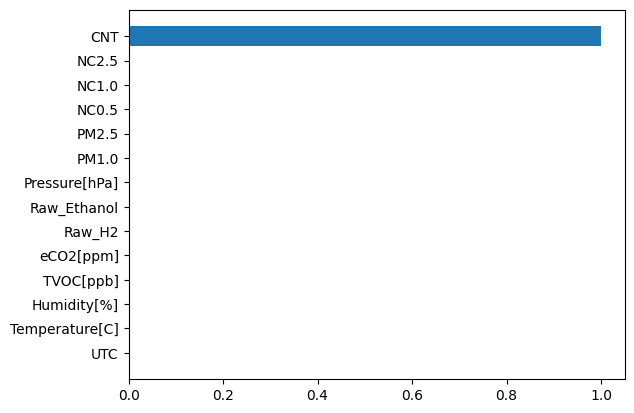

In [76]:
plt.barh(width=tree.feature_importances_, y=X_classification.columns);

## PCA

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)
X_pca_classification = pca.fit_transform(X_classification, y_classification)
X_pca_classification.shape

(34520, 2)

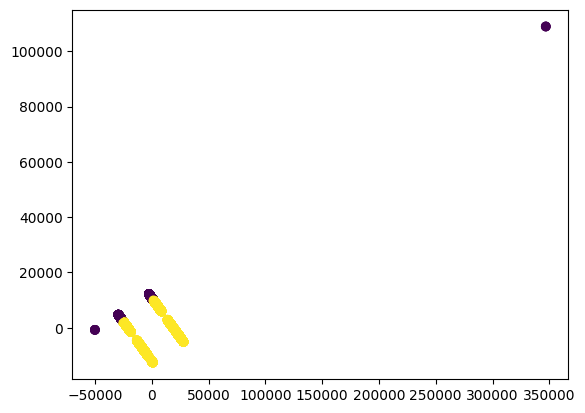

In [79]:
plt.scatter(X_pca_classification[:,0], X_pca_classification[:,1], c=y_classification);

In [80]:
sum(pca.explained_variance_ratio_)

0.9998630017755025

In [81]:
test_cl('X_pca_classification',X_pca_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



In [82]:
pca_2 = PCA(n_components=3)
X_pca_2_classification = pca_2.fit_transform(X_classification, y_classification)

In [83]:
test_cl('X_pca_2_classification',X_pca_2_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



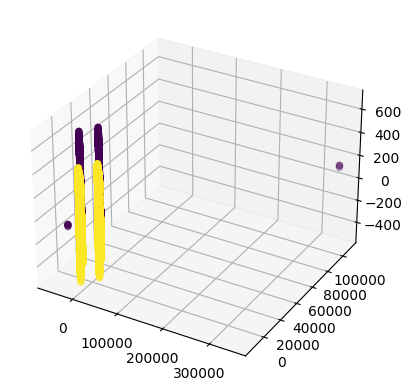

In [84]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2_classification[:,0], X_pca_2_classification[:,1], X_pca_2_classification[:,2], c=y_classification);

## TSNE

In [85]:
from sklearn.manifold import TSNE

In [86]:
tsne = TSNE(n_components=2)
X_tsne_classification = tsne.fit_transform(X_scaled_classification)

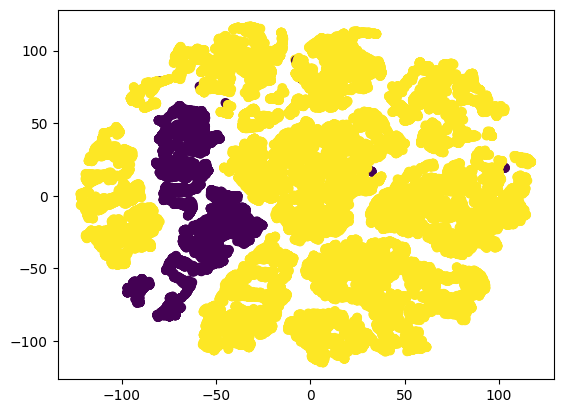

In [87]:
plt.scatter(X_tsne_classification[:,0], X_tsne_classification[:,1], c=y_classification);

In [88]:
test_cl('X_tsne_classification',X_tsne_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178



## Isomap

In [89]:
from sklearn.manifold import Isomap

Слишком долгое применение метода к данным (После 10 минут не завершился, другие методы быстрее и эффективнее для данного набора). 

## Добавление отчёта и просмотр 

In [90]:
for key in classification_reports:
    print(key, classification_reports[key])
reports['classification'] = classification_reports

X_classification               precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

X_vt_classification               precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

X_skb_classification               precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg    

In [107]:
for key1 in reports:
    print("-------------------------------"+"\n" +key1+ "\n" + "-------------------------------")
    for key2 in reports[key1]:
        print (key2, reports[key1][key2])

-------------------------------
regression
-------------------------------
X_regression 0.13589041095890414
X_vt_regression 0.16824543519428709
X_skb_regression 0.14876712328767122
X_rfe_regression 0.14659246575342466
X_pca_regression 0.21178082191780817
X_pca_2_regression 0.19232876712328767
X_tsne_regression 0.15294520547945203
X_isomap_regression 0.14917808219178083
-------------------------------
classification
-------------------------------
X_classification               precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

X_vt_classification               precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00      4458

    accuracy         